#### New to Plotly?
Plotly's Python library is free and open source! [Get started](https://plot.ly/python/getting-started/) by downloading the client and [reading the primer](https://plot.ly/python/getting-started/).
<br>You can set up Plotly to work in [online](https://plot.ly/python/getting-started/#initialization-for-online-plotting) or [offline](https://plot.ly/python/getting-started/#initialization-for-offline-plotting) mode, or in [jupyter notebooks](https://plot.ly/python/getting-started/#start-plotting-online).
<br>We also have a quick-reference [cheatsheet](https://images.plot.ly/plotly-documentation/images/python_cheat_sheet.pdf) (new!) to help you get started!

### Version Check
Note: The static image export API is available in version <b>3.2.0.+</b><br>

In [18]:
import plotly

plotly.__version__

'3.2.0a2'

### Static image export
New in version 3.2.0. It's now possible to programmatically export figures as high quality static images while fully offline.

#### Install dependencies
Static image generation requires the [orca](https://github.com/plotly/orca) commandline utility and the [psutil](https://github.com/giampaolo/psutil) Python library. There are 3 general approach to installing these dependencies.

##### conda
Using the [conda](https://conda.io/docs/) package manager, you can install these dependencies in a single command:
```
$ conda install -c plotly-orca psutil
```

**Note:** Even if you don't want to use conda to manage your Python dependencies, it is still useful as a cross platform tool for managing native libraries and command-line utilities (e.g. git, wget, graphviz, boost, gcc, nodejs, cairo, etc.).  For this use-case, start with [Miniconda](https://conda.io/miniconda.html) (~60MB) and tell the installer to add itself to your system `PATH`.  Then run `conda install plotly-orca` and the orca executable will be available system wide.

##### npm + pip
You can use the [npm](https://www.npmjs.com/get-npm) package manager to install `orca` (and its `electron` dependency), and then use pip to install `psutil`:

```
$ npm install -g electron@1.8.4 orca
$ pip install psutil
```

##### Standalone binaries + pip
If you are unable to install conda or npm, you can install orca as a precompiled binary for your operating system. Follow the instructions in the orca [README](https://github.com/plotly/orca) to install orca and add it to your system `PATH`. Then use pip to install `psutil`.

```
$ pip install psutil
```

### Create a figure
Now let's create a simple scatter plot with 100 random points of variying color and size.

In [20]:
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.io as pio

import os
import numpy as np

We'll configure the notebook for use in [offline](https://plot.ly/python/getting-started/#initialization-for-offline-plotting) mode

In [21]:
init_notebook_mode(connected=True)

In [23]:
N = 100
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
sz = np.random.rand(N)*30

fig = go.Figure()
fig.add_scatter(x=x,
                y=y,
                mode='markers',
                marker={'size': sz,
                        'color': colors,
                        'opacity': 0.6,
                        'colorscale': 'Viridis'
                       });
iplot(fig)

### Write image file
The `plotly.io.write_image` function is used to write an image to a file or file-like python object.

Let's first create an output directory to store our images

In [24]:
if not os.path.exists('images'):
    os.mkdir('images')

If you are running this notebook live, click to [open the output directory](./images) so you can examine the images as they're written.

#### Raster formats: PNG, JPEG, and WebP

Orca can output figures to several raster image formats including **PNG**, ...

In [25]:
pio.write_image(fig, 'images/fig1.png')

**JPEG**, ...

In [26]:
pio.write_image(fig, 'images/fig1.jpeg')

and **WebP**

In [27]:
pio.write_image(fig, 'images/fig1.webp')

#### Vector formats: SVG and PDF...

Orca can also output figures in several vector formats including **SVG**, ...

In [28]:
pio.write_image(fig, 'images/fig1.svg')

**PDF**, ...

In [29]:
pio.write_image(fig, 'images/fig1.pdf')

and **EPS** (requires the poppler library)

In [30]:
pio.write_image(fig, 'images/fig1.eps')

### Get image as bytes
The `plotly.io.to_image` function is used to return an image as a bytes object.

Let convert the figure to a **PNG** bytes object...

In [31]:
img_bytes = pio.to_image(fig, format='png')

and then display the first 20 bytes.

In [32]:
img_bytes[:20]

'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\xbc'

#### Display bytes as image using `IPython.display.Image`
A bytes object representing a PNG image can be displayed directly in the notebook using the `IPython.display.Image` class. This also works in the [Qt Console for Jupyter](https://qtconsole.readthedocs.io/en/stable/)!

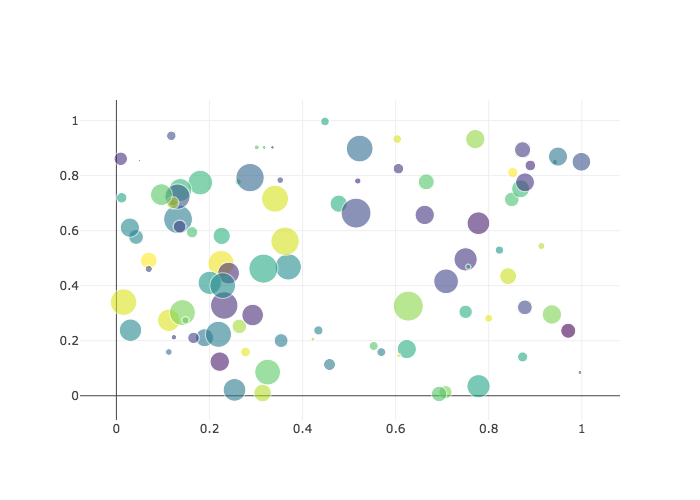

In [33]:
from IPython.display import Image
Image(img_bytes)

### Change image dimensions and scale
In addition to the image format, the `to_image` and `write_image` functions provide arguments to specify the image `width` and `height` in logical pixels. They also provide a `scale` parameter that can be used to increase (`scale` > 1) or decrease (`scale` < 1) the physical resolution of the resulting image.

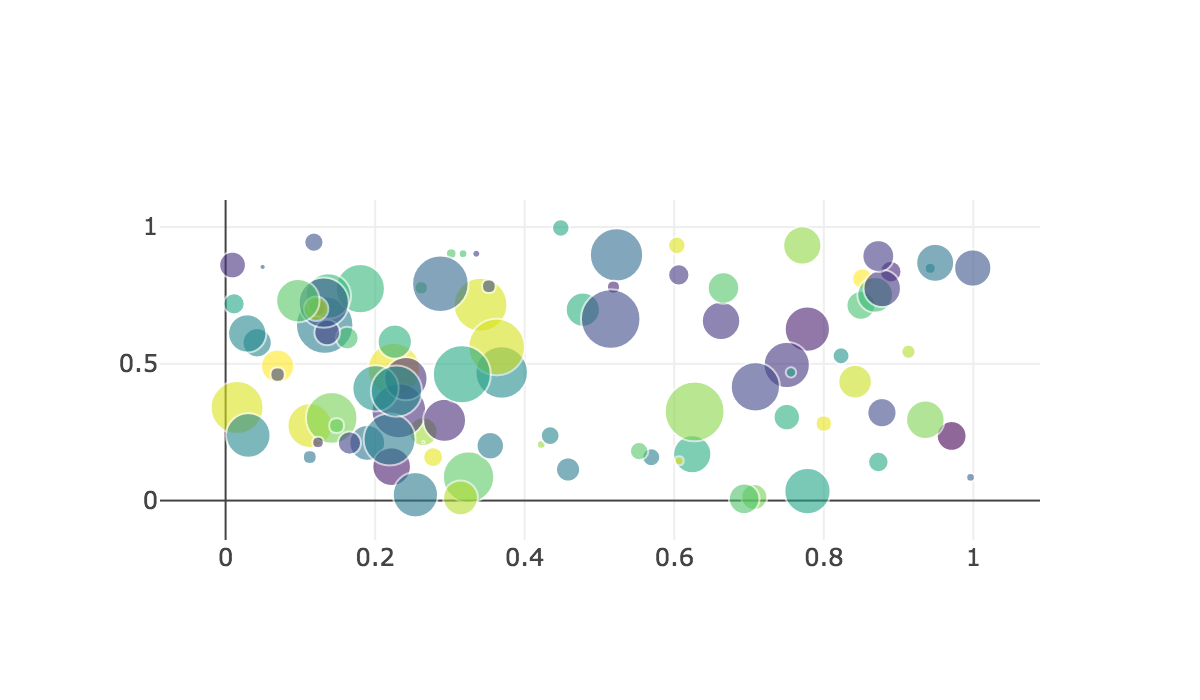

In [34]:
img_bytes = pio.to_image(fig, format='png', width=600, height=350, scale=2)
Image(img_bytes)

### Summary
In summary, to export high-quality static images from plotly.py all you need to do is install orca and psutil and then use the `plotly.io.write_image` and `plotly.io.to_image` functions.

If you want to know more about how the orca integration works, or if you need to troubleshoot an issue, please check out the [Orca Management](../orca-management/) section.

In [36]:
from IPython.display import display, HTML

display(HTML('<link href="//fonts.googleapis.com/css?family=Open+Sans:600,400,300,200|Inconsolata|Ubuntu+Mono:400,700" rel="stylesheet" type="text/css" />'))
display(HTML('<link rel="stylesheet" type="text/css" href="http://help.plot.ly/documentation/all_static/css/ipython-notebook-custom.css">'))

! pip install git+https://github.com/plotly/publisher.git --upgrade
import publisher
publisher.publish(
    'static-image-export.ipynb', 'python/static-image-export/', 'Static Image Export | plotly',
    'Plotly allows you to save static images of your plots. Save the image to your local computer, or embed it inside your Jupyter notebooks as a static image.',
    title = 'Static Image Export | plotly',
    name = 'Static Image Export',
    thumbnail='thumbnail/static-image-export.png',
    language='python',
    uses_plotly_offline=True,
    page_type='example_index', has_thumbnail='true', display_as='file_settings', order=1,
    ipynb='~notebook_demo/21')

  Cloning https://github.com/plotly/publisher.git to /private/var/folders/x2/smn4tpcs0s1ft0gg294_fq7h0000gn/T/pip-req-build-YQ04dW
  Running setup.py bdist_wheel for publisher ... done
  Stored in directory: /private/var/folders/x2/smn4tpcs0s1ft0gg294_fq7h0000gn/T/pip-ephem-wheel-cache-_58egu/wheels/99/3e/a0/fbd22ba24cca72bdbaba53dbc23c1768755fb17b3af0f33966
Successfully built publisher
  Found existing installation: publisher 0.11
    Uninstalling publisher-0.11:
      Successfully uninstalled publisher-0.11
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
